# Monoclinic 3x3x3

The diffusion coefficient for monoclinic 3x3x3 @300k is 1.7520477189131336e-12 m^2/s
The diffusion coefficient for triclinic 3x3x3 @300k is 1.976769055600637e-12 m^2/s
The conductivity for monoclinic 3x3x3 @300k is 0.000846003461885213 S/cm
The conductivity for triclinic 3x3x3 @300k is 0.0002807213013773843 S/cm


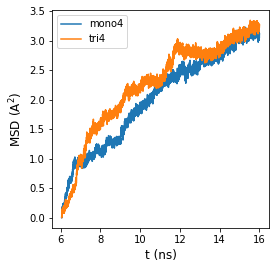

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import MSD files as lists:
step, mono4 = np.loadtxt('mono/monoclinic_4x4x4_300_li.txt', skiprows=2, unpack=True)
step2, tri4 = np.loadtxt('tri/triclinic_4x4x4_300_li.txt', skiprows=2, unpack=True)

steps = step / 1000000
steps2 = step2 / 1000000

mono4 = mono4 - mono4[1]
tri4 = tri4 - tri4[1]

# Plot MSD:   
plt.plot(steps[1:9950], mono4[1:9950])
plt.plot(steps2[1:9950], tri4[1:9950])

plt.xlabel('time, ns', size = 12)
plt.ylabel('MSD, A^2', size = 12)
plt.legend(['mono4', 'tri4'])

# Find diffusion coefficient:
mono4_slope, intercept = np.polyfit(steps, mono4, 1)
mono4_slope_standard_600 = float(mono4_slope * (10 ** (-11)))
tri4_slope, intercept = np.polyfit(steps2, tri4, 1)
tri4_slope_standard_600 = float(tri4_slope * (10 ** (-11)))

print(f'The diffusion coefficient for monoclinic 3x3x3 @300k is {mono4_slope_standard_600} m^2/s')
print(f'The diffusion coefficient for triclinic 3x3x3 @300k is {tri4_slope_standard_600} m^2/s')

mono4_cond = (((1.602 * 10**(-19))**2 * (1.559 * 10**(28)) * mono4_slope_standard_600)/((1.381 * 10**(-23)) * 600) * 10**(-2))
tri4_cond = (((1.602 * 10**(-19))**2 * (4.585 * 10**(27)) * tri4_slope_standard_600)/((1.381 * 10**(-23)) * 600) * 10**(-2))

print(f'The conductivity for monoclinic 3x3x3 @300k is {mono4_cond} S/cm')
print(f'The conductivity for triclinic 3x3x3 @300k is {tri4_cond} S/cm')

# Conversion of diffusion coefficient to conductivity as follows:
# conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
#
# charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
#
# charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
#
# diffusion coefficient calcualted as above fromm MSD plot slopes
#
# boltzmann constant = 1.381 * 10**(-23) J/K
#
# temperature varies with experiment
#
# !!! 10**(-2) added to get final results in S/cm as conventionally displayed

plt.ylabel('MSD ($\mathrm{A^2}$)', size=12)
plt.xlabel('t (ns)', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_4.jpg', bbox_inches='tight', dpi=500)

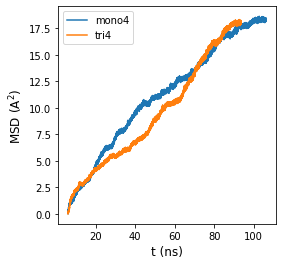

In [3]:
plt.plot(steps[1:], mono4[1:])
plt.plot(steps2[1:], tri4[1:])

plt.ylabel('MSD ($\mathrm{A^2}$)', size=12)
plt.xlabel('t (ns)', size=12)
plt.legend(['mono4', 'tri4'])

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_4_long.jpg', bbox_inches='tight', dpi=500)

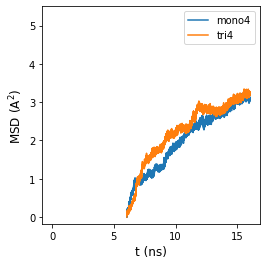

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(steps[1:9950], mono4[1:9950])
plt.plot(steps2[1:9950], tri4[1:9950])

plt.ylabel('MSD ($\mathrm{A^2}$)', size=12)
plt.xlabel('t (ns)', size=12)
plt.legend(['mono4', 'tri4'])
plt.ylim(None, 5.5)

fx = [0]
fy = [0]
plt.plot(fy, fx)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_4_scaled.jpg', bbox_inches='tight', dpi=500)

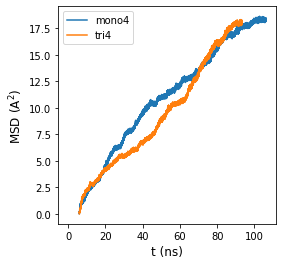

In [6]:
plt.plot(steps[1:], mono4[1:])
plt.plot(steps2[1:], tri4[1:])

plt.ylabel('MSD ($\mathrm{A^2}$)', size=12)
plt.xlabel('t (ns)', size=12)
plt.legend(['mono4', 'tri4'])

fx = [0]
fy = [0]
plt.plot(fy, fx)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_4_long_scaled.jpg', bbox_inches='tight', dpi=500)

<ipython-input-5-7faa70f61181>:10: RuntimeWarning: invalid value encountered in log10
  log_mono4.append(np.log10(item))
<ipython-input-5-7faa70f61181>:10: RuntimeWarning: divide by zero encountered in log10
  log_mono4.append(np.log10(item))
<ipython-input-5-7faa70f61181>:13: RuntimeWarning: invalid value encountered in log10
  log_tri4.append(np.log10(item))
<ipython-input-5-7faa70f61181>:13: RuntimeWarning: divide by zero encountered in log10
  log_tri4.append(np.log10(item))


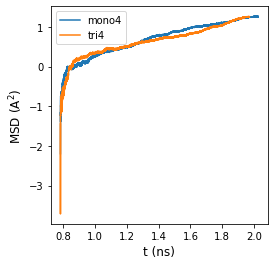

In [5]:
import numpy as np
import matplotlib.pyplot as plt

log_mono4 = []
log_tri4 = []
log_steps = []
log_steps2 = []

for item in mono4:
    log_mono4.append(np.log10(item))
    
for item in tri4:
    log_tri4.append(np.log10(item))
    
for item in steps:
    log_steps.append(np.log10(item))
    
for item in steps2:
    log_steps2.append(np.log10(item))

plt.plot(log_steps[1:], log_mono4[1:])
plt.plot(log_steps2[1:], log_tri4[1:])

plt.ylabel('MSD ($\mathrm{A^2}$)', size=12)
plt.xlabel('t (ns)', size=12)
plt.legend(['mono4', 'tri4'])

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_4_long_log.jpg', bbox_inches='tight', dpi=500)